## MTHE 472: Computational Assignment
##### Jade Watson 20052115

#### Define Parameters

In [1]:
# B = fading channel in bad state and G = channel in good state
X = ['B','G']
# u = 0 not to use the channel and u = 1 to use channel
U = ['0','1']

# define transition function
def T(x_next,x,u):
    if x_next == 'G' and u == '1' and x == 'G':
        prob  = 0.3
        return prob
    elif x_next == 'G' and u == '0' and x == 'G':
        prob = 0.7
        return prob
    elif x_next == 'G' and u == '1' and x == 'B':
        prob = 0.5
        return prob
    elif x_next == 'G' and u == '0' and x == 'B':
        prob = 0.9
        return prob
    elif x_next == 'B' and u == '1' and x == 'G':
        prob = 0.7
        return prob
    elif x_next == 'B' and u == '0' and x == 'G':
        prob = 0.3
        return prob
    elif x_next == 'B' and u == '1' and x == 'B':
        prob = 0.5
        return prob
    elif x_next == 'B' and u == '0' and x == 'B':
        prob = 0.1
        return prob

# cost function
def C(x,u):
    if x == 'G' and u == '1':
        c = -1 + e*(float(u))
        return c
    else:
        c = e*(float(u))
        return c

#### Problem 1(i): Value Iteration

In [2]:
def value_iteration(X,U,T,C):
    """
    :param list X: set of states
    :param list U: encoder use
    :param function P: transition function
    :param function C: cost function
    """
    # set value function for each state x to zero
    # initialize value function V as a dictionary to track the state as a key
    V = {x: 0 for x in X}
    optimal_policy = {x: 0 for x in X}

    while True:
        # store value functions at previous iteration
        prev_V = V.copy()
        for x in X:
            # Q(x,u) expected total cost for taking action u in state x
            Q = {}
            # calculate Q for each encoder u to update V(s)
            for u in U:
                Q[u] = C(x,u) + beta*sum(T(x_next,x,u)*prev_V[x_next] for x_next in X)
            # V(x): minimum expected total cost starting from state x (value function)
            V[x] = min(Q.values())
            optimal_policy[x] = min(Q, key=Q.get)
        # check if the value function is the same by comparing it to prev value
        if all(prev_V[x] == V[x] for x in X):
            break
    return V, optimal_policy

In [3]:
eta = [2/3, 0.95, 0.05]
beta = 0.8
for e in eta:
    V, optimal_policy = value_iteration(X,U,T,C)
    print("The optimal solution with eta value ",e,"is: ",V)
    print("The corresponding policy is: ",optimal_policy)

The optimal solution with eta value  0.6666666666666666 is:  {'B': -0.810810810810811, 'G': -1.0360360360360361}
The corresponding policy is:  {'B': '0', 'G': '1'}
The optimal solution with eta value  0.95 is:  {'B': -0.12162162162162174, 'G': -0.15540540540540554}
The corresponding policy is:  {'B': '0', 'G': '1'}
The optimal solution with eta value  0.05 is:  {'B': -2.31081081081081, 'G': -2.9527027027027017}
The corresponding policy is:  {'B': '0', 'G': '1'}


#### Problem 1(ii): Policy Iteration

In [4]:
#  in policy value, want to update the value function at a policy until they are the same
def policy_value(policy,X):
    # initialize value function as a dictionary
    V = {x: 0 for x in X}
    while True:
        # stores previous value to be used for termination condition
        prev_V = V.copy()
        # update value for each state x
        for x in X:
            u = policy[x]
            V[x] = C(x,u) + beta*sum(T(x_next,x,u)*prev_V[x_next] for x_next in X)
        # termination condition: if previous value is the same as current
        if all(prev_V[x] == V[x] for x in X):
            break
    return V

In [5]:
# find the best policy for given value function
def best_policy(V,X,U):
    policy = {x: U[0] for x in X}

    for x in X:
        Q = {}
        for u in U:
            Q[u] = C(x,u) + beta*sum(T(x_next,x,u)*V[x_next] for x_next in X)

            policy[x] = min(Q,key=Q.get)
    return policy

In [6]:
def policy_iteration(X,U):
    """
    :param list X: set of states
    :param list U: encoder use
    :param function P: transition function
    :param function C: cost function
    """
    # initialize policy function, policy, as a dictionary by setting its value to the first element of encoder set U
    policy = {x: U[0] for x in X}

    while True:
        # store policy at previous iteration
        prev_policy = policy.copy()
        # calculate value function under current policy
        V = policy_value(policy,X)
        # update the policy
        policy = best_policy(V,X,U)
        # termination condition: does the policy remain the same
        if all(prev_policy[x] == policy[x] for x in X):
            break
    return V,policy

In [7]:
eta = [2/3, 0.95, 0.05]
beta = 0.8
for e in eta:
    V,optimal_policy = policy_iteration(X,U)
    print("The optimal policy with eta value ", e,"is: ",optimal_policy)
    print("The optimal solution with eta value ",e,"is: ",V)

The optimal policy with eta value  0.6666666666666666 is:  {'B': '0', 'G': '1'}
The optimal solution with eta value  0.6666666666666666 is:  {'B': -0.810810810810811, 'G': -1.0360360360360361}
The optimal policy with eta value  0.95 is:  {'B': '0', 'G': '1'}
The optimal solution with eta value  0.95 is:  {'B': -0.12162162162162174, 'G': -0.15540540540540554}
The optimal policy with eta value  0.05 is:  {'B': '0', 'G': '1'}
The optimal solution with eta value  0.05 is:  {'B': -2.31081081081081, 'G': -2.9527027027027017}


#### Problem 1 (iii): Q Learning

In [8]:
import numpy as np
import random

beta = 0.8
eta = 2/3

# state is 0 <=> state is G
# state is 1 <=> state is B

# initializing Q matrix
Q = np.array([[1,1],[1,1]])

# initializing states and action space
T = 10 # shape of np array and total time
states = np.empty(T,int)
actions = np.empty(T,int)
# set all to -1
for i in range(T):
    states[i] = -1
    actions[i] = -1

# learning rate function where t is the time, x is the state, u is the action
def alpha(t,x,u):
    summation = 0
    for i in range(0,t):
        if states[i] == x and actions[i] == u:
            summation = summation + 1
    return 1/(1+summation)

# re-define cost function such that is uses numbers instead of strings
def C(x,u):
    indicator = 0
    if x == 0 and u == 1:
        indicator = 1
    return eta*u-indicator

# choose an action using the epsilon-greedy exploration strategy
# each time you need to choose an action, randomly generate a value (probability). If the value has prob less than an epsilon, choose a random action. Otherwise, take the best known action at the agents current state
def choose_action(x,u):
    transition_var = random.uniform(0,1) # generates random number between 0 and 1
    if x == 0 and u == 0:
        if transition_var < 0.7:
            # explore random action
            x_next = 0
            return x_next
        else:
            # select the action with max value (future reward)
            x_next = 1
            return x_next
    elif x == 0 and u == 1:
        if transition_var < 0.3:
            x_next = 0
            return x_next
        else:
            x_next = 1
            return x_next
    elif x ==1 and u ==0:
        if transition_var < 0.1:
            x_next = 1
            return x_next
        else:
            x_next = 0
            return x_next
    elif x == 1 and u == 1:
        if transition_var < 0.5:
            x_next = 1
            return x_next
        else:
            x_next = 0
            return x_next
    else:
        return "error"

In [9]:
x_t = 0
u_t = 0
j = 0

states[0] = x_t
actions[0] = u_t

# Q-learning function
while j < T-1:
    # choose action u from X using epsilon-greedy policy derived from Q
    x_next = choose_action(x_t,u_t)
    minArg = 100.0
    if Q[x_next,0] > Q[x_next,1]:
        u_next = 1
        minArg = Q[x_next,1]
    else:
        u_next = 0
        minArg = Q[x_next,0]

    # Take action U, then observe cost C and next state X
    Q[states[x_t],actions[u_t]] = Q[states[x_t],actions[u_t]] +alpha(j,x_t,u_t) * (C(x_t,u_t)+beta*minArg-Q[states[x_t],actions[u_t]])

    # repeat until time limit is reached and update values
    j = j+1
    x_t = x_next
    u_t = u_next
    states[j] = x_t
    actions[j] = u_t

# Print result of Q-table containing Q(X,U) pairs defining optimal policy
print("Q = ", Q)
print("states = ",states)
print("actions = ",actions)

Q =  [[0 1]
 [0 1]]
states =  [0 1 0 0 0 0 0 1 0 1]
actions =  [0 0 0 0 0 0 0 0 0 0]


Upon comparing the three methods above (value iteration, policy iteration, and Q learning), each method outputs a result that further proves the validity of the next method. I.e. all results coincide with each other. For example, value iteration with eta 2/3 outputs {'B': -0.810810810810811, 'G': -1.0360360360360361}
The corresponding policy is:  {'B': '0', 'G': '1'}. The result of the policy iteration matches these values exactly. Q-learning further emphasizes the optimal policy to be [0,1].

#### Problem 1(b)

In [10]:
# use convex analytical method to get expected cost
beta = 0.8
eta = 2/3

# initialize starting values
u_G = 0
u_B = 0
min_cost = 0
optimalPolicy = [0,0]

# check handwritten notes for derivation of the numerator and denominator
for u_G in range(2):
    for u_B in range(2):
        numerator = eta*(0.5*u_G+0.4*(1-u_B)*u_G+0.7*u_B-0.4*(1-u_G)*u_B) - (0.5*u_G+0.4*(1-u_B)*u_G)
        denominator = 1.2 - 0.4*(1-u_G)+0.4*(1-u_B)
        expected_cost = numerator / denominator

        # check if we have reached minimum cost and take policy at such cost
        if expected_cost < min_cost:
            min_cost = expected_cost
            optimalPolicy[0] = u_G
            optimalPolicy[1] = u_B

print("The minimum expected cost is ", min_cost)
print("The optimal policy is ",optimalPolicy)

The minimum expected cost is  -0.18750000000000003
The optimal policy is  [1, 0]


#### Problem 2(b)

In [2]:
import numpy as np
from numpy.linalg import matrix_rank

# define given matrices and noise
T = 1000
A = np.matrix([[0.75,1,0],[0,0.75,1],[0,0,0.75]])
C = np.matrix([2,0,0])
I = np.matrix([[1,0,0],[0,1,0],[0,0,1]])
W = I # noise
V = 1 # noise

# initialize and set up array for inputs and outputs
sigma_t = I
x_t = np.matrix.transpose(np.matrix([1,0,0]))
m_t = x_t
results = np.zeros(T)
states = np.zeros((T,3,1))
belief_variables = np.zeros((T,3,1))
error_covariances = np.zeros((T,3,3))

# initialize states, beliefs, and error
x_states = np.zeros(T)
y_states = np.zeros(T)
z_states = np.zeros(T)

x_beliefs = np.zeros(T)
y_beliefs = np.zeros(T)
z_beliefs = np.zeros(T)

x_error = np.zeros(T)
y_error = np.zeros(T)
z_error = np.zeros(T)

# check observability
observability_matrix = [[2,0,0],[1.5,2,0],[9/8,3,2]]
rank = np.linalg.matrix_rank(observability_matrix)
print("Rank of observability matrix is: ",rank)

Rank of observability matrix is:  3


In [3]:
# Refer to handwritten results from a for defined equations

import random

t = 0

while t < T:
    # Noise initialization
    v_t = np.random.normal(0,1,1)
    w_t = np.matrix.transpose(np.matrix(np.random.normal(0,1,3)))
    # update system
    y_t = np.matmul(C,x_t) + np.random.normal(0,1,1)
    x_next = np.matmul(A,x_t) + w_t

    # update error covariance
    sigma_next = W + np.matmul(A,np.matmul(sigma_t,np.matrix.transpose(A))) - (np.matmul(A,np.matmul(sigma_t,np.matrix.transpose(C))))*np.linalg.inv((np.matmul(C,np.matmul(sigma_t,np.matrix.transpose(C)))+V))*(np.matmul(C,np.matmul(sigma_t,np.matrix.transpose(A))))

    # update beliefs
    # m_tilda_t
    m_next = np.matmul(A,m_t)+np.matmul(np.matmul(sigma_next,np.matrix.transpose(C)),(y_t-np.matmul(C,np.matmul(A,m_t))))*np.linalg.inv(np.matmul(np.matmul(C,sigma_next),np.matrix.transpose(C))+v_t)

    # Update output matrices
    results[t] = y_t
    states[t,:,:] = x_t
    belief_variables[t,:,:] = m_t
    error_covariances[t,:,:] = sigma_t

    #Update Recursion
    sigma_t = sigma_next
    m_t = m_next
    x_t = x_next
    t = t+1

In [4]:
# Update states, beliefs, and estimation error
for j in range(T-1):
    x_states[j] = states[j,0,0]
    y_states[j] = states[j,1,0]
    z_states[j] = states[j,2,0]

    x_beliefs[j] = belief_variables[j,0,0]
    y_beliefs[j] = belief_variables[j,1,0]
    z_beliefs[j] = belief_variables[j,2,0]

    x_error[j] = x_states[j] - x_beliefs[j]
    y_error[j] = y_states[j] - y_beliefs[j]
    z_error[j] = z_states[j] - z_beliefs[j]

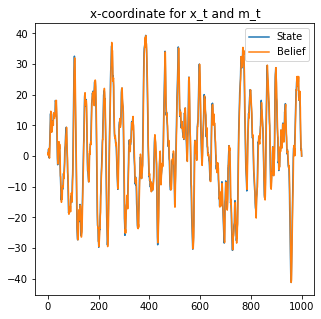

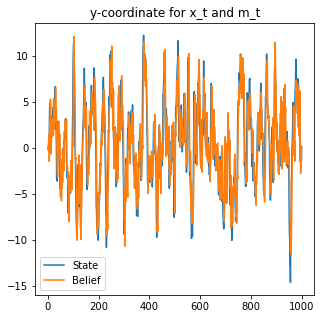

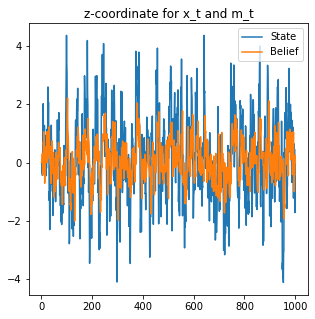

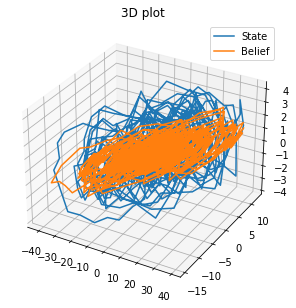

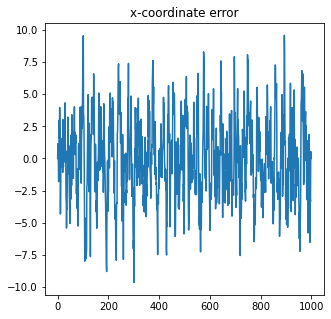

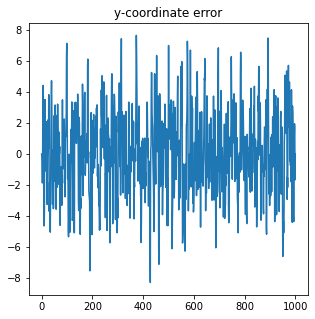

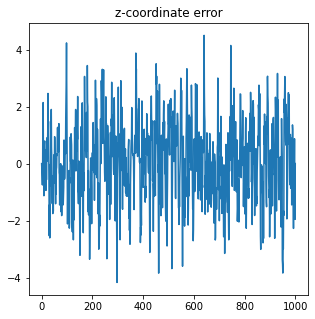

In [5]:
from matplotlib import pyplot as plt

# plot x-coordinate of x_t, m_t
figure1 = plt.figure(figsize=(5,5))
x = np.linspace(1,1000,T)
ax1 = figure1.add_subplot(111)
ax1.plot(x,x_states)
ax1.plot(x,x_beliefs)
ax1.legend(['State','Belief'])
ax1.set_title("x-coordinate for x_t and m_t")

# plot y-coordinate of x_t, m_t
figure2 = plt.figure(figsize=(5,5))
y = np.linspace(1,1000,T)
ax2 = figure2.add_subplot(111)
ax2.plot(y,y_states)
ax2.plot(y,y_beliefs)
ax2.legend(['State','Belief'])
ax2.set_title("y-coordinate for x_t and m_t")

# plot z-coordinate of x_t, m_t
figure3 = plt.figure(figsize=(5,5))
z = np.linspace(1,1000,T)
ax3 = figure3.add_subplot(111)
ax3.plot(z,z_states)
ax3.plot(z,z_beliefs)
ax3.legend(['State','Belief'])
ax3.set_title("z-coordinate for x_t and m_t")

# 3D of all coordinates
figure4 = plt.figure(figsize=(5,5))
ax4 = figure4.add_subplot(111, projection='3d')
ax4.plot(x_states,y_states,z_states)
ax4.plot(x_beliefs,y_beliefs,z_beliefs)
ax4.legend(['State','Belief'])
ax4.set_title("3D plot")

# x-coordinate error
figure5 = plt.figure(figsize=(5,5))
q = np.linspace(0,1000,T)
ax5 = figure5.add_subplot(111)
ax5.plot(q,x_error)
ax5.set_title("x-coordinate error")

# y-coordinate error
figure6 = plt.figure(figsize=(5,5))
ax6 = figure6.add_subplot(111)
ax6.plot(q,y_error)
ax6.set_title("y-coordinate error")

# z-coordinate error
figure7 = plt.figure(figsize=(5,5))
ax7 = figure7.add_subplot(111)
ax7.plot(q,z_error)
ax7.set_title("z-coordinate error")

plt.show()

#### Problem 2(c)

In [6]:
from scipy.optimize import fsolve

def riccati(P):
    print(P.shape)
    print(A.shape)

    riccati_recursion = np.matmul(C,np.matrix.transpose(C)) + np.matmul(np.matmul(np.matrix.transpose(A),P),A) - P
    return riccati_recursion

riccati_converge = fsolve(riccati, np.matrix([[1,0,0],[0,1,0],[0,0,1]]))

(9,)
(3, 3)


ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 9 is different from 3)

Does not stabilize around P because the Riccati conditions are not met as expected from the explanation in c.

In [16]:
print("The 999th covariance matrix is ", error_covariances[999])

The 999th covariance matrix is  [[4.98145231 4.12780699 1.01482848]
 [4.12780699 6.8086493  2.11746902]
 [1.01482848 2.11746902 2.03260534]]


In [17]:
print("The 60th covariance matrix is ",error_covariances[60])

The 60th covariance matrix is  [[4.98145231 4.12780699 1.01482848]
 [4.12780699 6.8086493  2.11746902]
 [1.01482848 2.11746902 2.03260534]]


In [18]:
print("The 123rd covariance matrix is ",error_covariances[123])

The 123rd covariance matrix is  [[4.98145231 4.12780699 1.01482848]
 [4.12780699 6.8086493  2.11746902]
 [1.01482848 2.11746902 2.03260534]]


Therefore, the sigma matrices recursion converge and is unique as seen in the matrices above. This is expected as explained in the handwritten solution c.